In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [51]:
df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [52]:
reason_cols = [
    "Reason for cancelling by Customer",
    "Driver Cancellation Reason",
    "Incomplete Rides Reason"
]

df = df.drop(columns=reason_cols)

In [53]:
df["Cancelled Rides by Customer"] = np.where(df["Booking Status"]=="Cancelled by Customer", 1, 0)
df["Cancelled Rides by Driver"] = np.where(df["Booking Status"]=="Cancelled by Driver", 1, 0)
df["Incomplete Rides"] = np.where(df["Booking Status"]=="Incomplete", 1, 0)

In [54]:
completed = df["Booking Status"]=="Completed"
cancelled = df["Booking Status"]!="Completed"

In [55]:
num_cols = ["Avg VTAT","Avg CTAT","Booking Value","Ride Distance","Driver Ratings","Customer Rating"]

for col in num_cols:
    df.loc[completed, col] = df[completed].groupby("Vehicle Type")[col].transform(lambda x: x.fillna(x.median()))

In [56]:
# Step 1: Flags
cancelled = df["Booking Status"].str.contains("cancel", case=False, na=False)
incomplete = df["Incomplete Rides"].notna()

# Step 2: Numeric columns
num_cols = ["Avg VTAT", "Avg CTAT", "Booking Value", "Ride Distance"]
df[num_cols] = df[num_cols].astype("object")

# Step 3: Replace for cancelled and incomplete rides
df.loc[cancelled | incomplete, num_cols] = "Not Applicable"

In [57]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S")

df["Hour"] = df["Time"].apply(lambda x: x.strftime("%I %p"))

df["Time"] = df["Time"].dt.time

df["Day"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()

In [64]:
# Check initial columns
print("Columns before dropping:")
print(df.columns)

# Drop specified columns
cols_to_drop = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance']
df.drop(columns=cols_to_drop, inplace=True)

# Check columns after dropping
print("\nColumns after dropping:")
print(df.columns)

# Optional: view first few rows
print(df.head())


Columns before dropping:
Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer', 'Cancelled Rides by Driver',
       'Incomplete Rides', 'Booking Value', 'Ride Distance', 'Driver Ratings',
       'Customer Rating', 'Payment Method', 'Hour', 'Day', 'Month'],
      dtype='object')

Columns after dropping:
Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location',
       'Cancelled Rides by Customer', 'Cancelled Rides by Driver',
       'Incomplete Rides', 'Driver Ratings', 'Customer Rating',
       'Payment Method', 'Hour', 'Day', 'Month'],
      dtype='object')
        Date      Time    Booking ID   Booking Status   Customer ID  \
0 2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1 2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2 2024-08-23  0

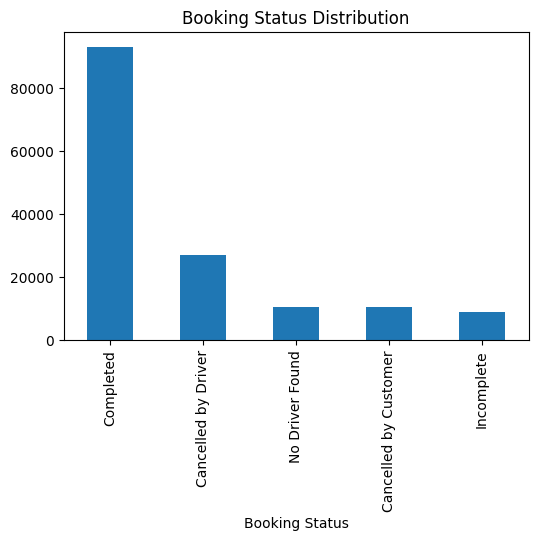

In [65]:
df["Booking Status"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Booking Status Distribution")
plt.show()

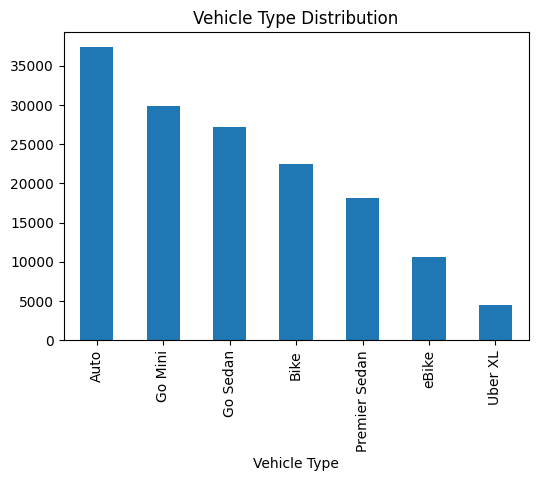

In [66]:
df["Vehicle Type"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Vehicle Type Distribution")
plt.show()

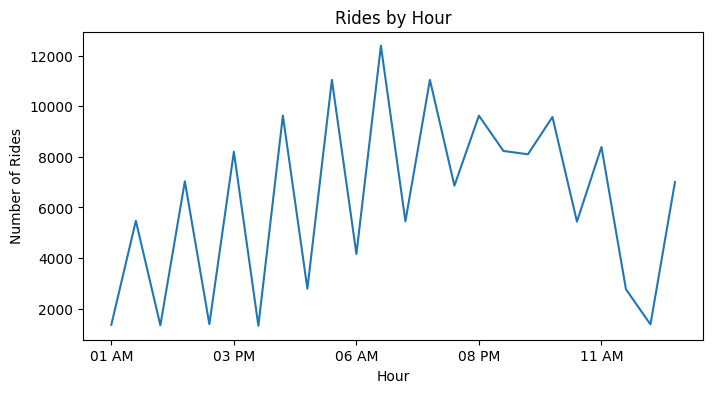

In [67]:
df["Hour"].value_counts().sort_index().plot(kind="line", figsize=(8,4))
plt.title("Rides by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.show()

In [68]:
 clean_cols = df.copy()

In [70]:
 clean_cols.to_csv('uberdata_cleaned.csv', index=False)
 print('Cleaned CSV exported: uberdata_cleaned.csv')

Cleaned CSV exported: uberdata_cleaned.csv


In [27]:
!pip install pymysql sqlalchemy

In [71]:
from sqlalchemy import create_engine

# MySQL connection
username = "root"
password = "2005"
host = "localhost"
port = "3306"
database = "project"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

# Write DataFrame to MySQL
table_name = "uber"   # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

# Read back sample
pd.read_sql("SELECT * FROM uber LIMIT 5;", engine)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Driver Ratings,Customer Rating,Payment Method,Hour,Day,Month
0,2024-03-23,0 days 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,0,0,0,NaN,NaN,None,12 PM,Saturday,March
1,2024-11-29,0 days 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,0,0,1,NaN,NaN,UPI,06 PM,Friday,November
2,2024-08-23,0 days 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,0,0,0,4.9,4.9,Debit Card,08 AM,Friday,August
3,2024-10-21,0 days 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,0,0,0,4.6,5.0,UPI,05 PM,Monday,October
4,2024-09-16,0 days 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,0,0,0,4.1,4.3,UPI,10 PM,Monday,September
